The weight vectors are:
[[ 32.22746  31.98921]
 [ 34.92905  41.19041]
 [ 37.57728  51.3808 ]
 [ 38.76591  59.62943]
 [ 28.75091 113.24792]
 [ 28.3999  121.22066]
 [ 33.95901 124.69479]
 [ 51.82014 130.20464]
 [112.3152  129.01419]
 [120.83331 126.69587]
 [115.3593  124.58296]
 [106.05216 100.67436]
 [100.74674  57.64555]
 [ 99.39548  46.40187]
 [101.02439  37.33399]
 [107.25595  30.91788]]


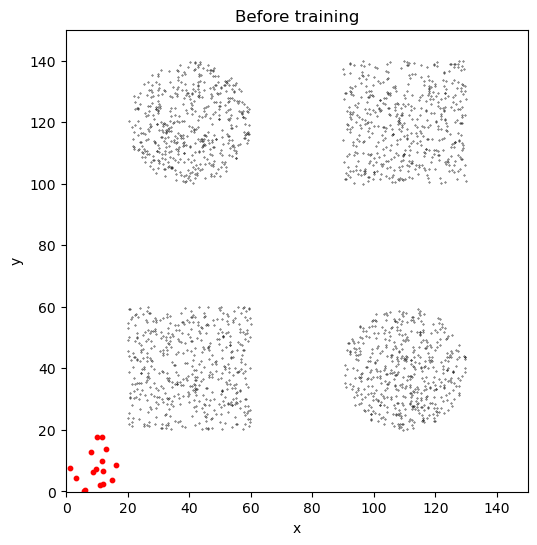

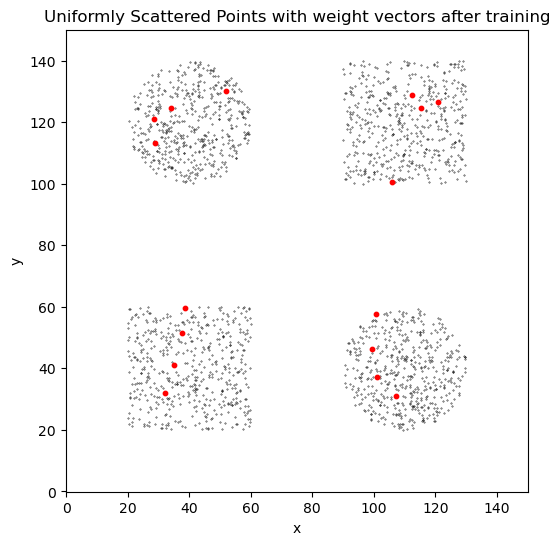

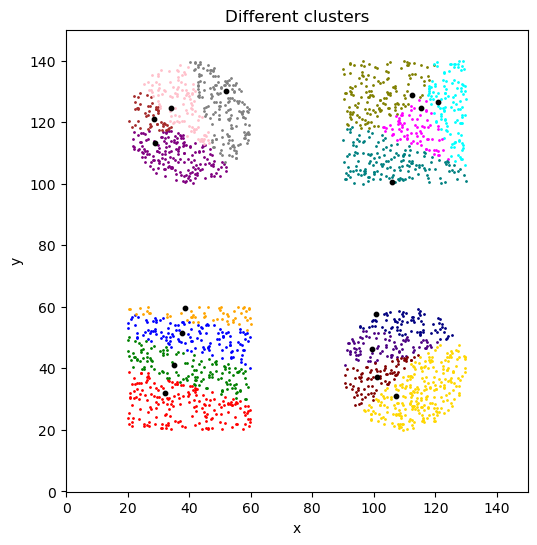

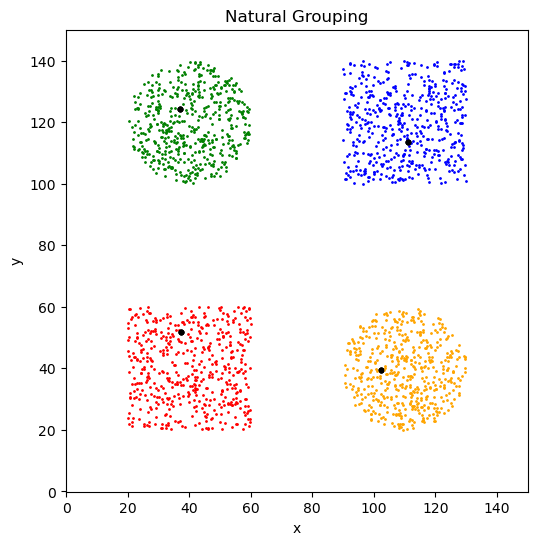

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Load data points
with open('data_points2.txt', 'r') as f:
    lines = [line.strip().split(' ') for line in f]
    data_points = [[float(x) for x in line] for line in lines]
with open('avg.txt', 'r') as f:
    avg = float(f.read())
    
# Shuffle data points
random.shuffle(data_points)

# Convert data points to numpy array
data = np.array(data_points)

#Loading the data coordinates
x = (np.array(data_points).T)[0]
y = (np.array(data_points).T)[1]

# Set parameters for KSOM
som_shape = 16
input_len = data.shape[1]
sigma = 1
learning_rate = 0.5
num_iterations = 10

# Initialize weights randomly
som_weights = np.random.rand(som_shape, input_len)*20

#coordinates to plot the weights
x_wt = (np.array(som_weights).T)[0]
y_wt = (np.array(som_weights).T)[1]

# Plot the data as a scatter plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, s=0.1, color='black')
ax.scatter(x_wt, y_wt, s=10, color='red')

# Set plot properties
ax.set_aspect('equal')
ax.set_xlim(-0.1, 150.1)
ax.set_ylim(-0.1, 150.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Before training')

# Train KSOM
for i in range(num_iterations):
    # Select random input vector
    for input_index in range(data.shape[0]):
        input_vector = data[input_index]

        # Find winner neuron
        dists = np.sum((som_weights - input_vector)**2, axis=1)
        winner_index = np.argmin(dists)

        # Update neighborhood
        for j in range(som_shape):
                dist = np.abs(j - winner_index)
                if dist <= sigma:
                    neighborhood = np.exp(-dist**2/(2*sigma**2))
                    som_weights[j] += learning_rate*neighborhood*(input_vector - som_weights[j])

#for weights outside
for i in range(som_shape):
    mini=10000
    index_j = 0
    for j in range(data.shape[0]):
        dist = math.sqrt((som_weights[i][0] - data[j][0])**2 + (som_weights[i][1] - data[j][1])**2)
        if mini > dist:
            index_j = j
            mini = dist
    if (dist>avg):
        som_weights[i][0] = data[index_j][0]
        som_weights[i][1] = data[index_j][1]
                    
print("The weight vectors are:")
print(som_weights)
                    
#coordinates to plot the weights
x_wt = (np.array(som_weights).T)[0]
y_wt = (np.array(som_weights).T)[1]

# Plot the data as a scatter plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, s=0.1, color='black')
ax.scatter(x_wt, y_wt, s=10, color='red')

# Set plot properties
ax.set_aspect('equal')
ax.set_xlim(-0.1, 150.1)
ax.set_ylim(-0.1, 150.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Uniformly Scattered Points with weight vectors after training')

# Assign each data point to the closest weight vector
labels = np.argmin(np.sum((data[:,np.newaxis, :] - som_weights)**2, axis=2), axis=1)

# Plot clusters with margins
fig, ax = plt.subplots(figsize=(6,6))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'teal', 'navy', 'indigo', 'maroon', 'gold']
for i in range(som_shape):
    cluster_data = data[labels == i]
    cluster_mean = som_weights[i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=1, color=colors[i])
ax.scatter(x_wt, y_wt, s=10, color='black')

# Set plot properties
ax.set_aspect('equal')
ax.set_xlim(-0.1, 150.1)
ax.set_ylim(-0.1, 150.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Different clusters')

for i in range(som_shape):
    if len(data[labels == i]) == 0:
        som_weights = np.delete(som_weights, i, axis=0)
        som_shape -= 1
# Assign each data point to the closest weight vector
labels = np.argmin(np.sum((data[:, np.newaxis, :] - som_weights)**2, axis=2), axis=1)

# count =1
while True:
#     print(f'Iteration = {count}')
    num = som_shape
    for i in range(som_shape):
        for j in range(som_shape):
                cluster_data1 = data[labels == i]
                cluster_data2 = data[labels == j]
                min_dist = np.inf
                for x1, y1 in cluster_data1:
                    for x2, y2 in cluster_data2:
                        dist = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                        if dist < min_dist:
                            min_dist = dist
                
#                 for k in range(cluster_data1.shape[0]):
#                     for l in range(cluster_data2.shape[0]):
#                         dis = math.sqrt((cluster_data2[l][0] - cluster_data1[k][0])**2 + (cluster_data2[l][1] - cluster_data1[k][1])**2)
#                         min_dis = min(min_dis, dis)
#                 print(min_dist)
                if (min_dist >= avg+2):
                    continue
                else:
                    # Merge the clusters
                    if (j < som_shape) and (i!=j):
                        som_weights[i] = (som_weights[i] + som_weights[j]) / 2
                        som_weights = np.delete(som_weights, j, axis=0)
                        som_shape -= 1
                        # Assign each data point to the closest weight vector
                        labels = np.argmin(np.sum((data[:, np.newaxis, :] - som_weights)**2, axis=2), axis=1)
#         print("wait\n")
    for i in range(som_shape):
        if len(data[labels == i]) == 0:
            som_weights = np.delete(som_weights, i, axis=0)
            som_shape -= 1
    # Assign each data point to the closest weight vector
    labels = np.argmin(np.sum((data[:, np.newaxis, :] - som_weights)**2, axis=2), axis=1)
    if (num == som_shape):
        break

# Plot clusters with margins
fig, ax = plt.subplots(figsize=(6,6))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'teal', 'navy', 'indigo', 'maroon', 'gold']
for i in range(som_shape):
    cluster_data = data[labels == i]
    cluster_mean = som_weights[i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=1, color=colors[i])

    x_wt = (np.array(som_weights).T)[0]
    y_wt = (np.array(som_weights).T)[1]
    ax.scatter(x_wt, y_wt, s=10, color='black')

# Set plot properties
ax.set_aspect('equal')
ax.set_xlim(-0.1, 150.1)
ax.set_ylim(-0.1, 150.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Natural Grouping')
#     count +=1

plt.show()